In [1]:
%%%HTML
<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>
<a href="https://github.com/a1rb4Ck/MECA654"><img style="position: absolute; top: 0; right: 0; border: 0;" src="https://s3.amazonaws.com/github/ribbons/forkme_right_darkblue_121621.png" alt="Fork me on GitHub"></a>

In [2]:
# MECA654, March 2018, Pierre Nagorny
# Polytech Annecy-Chambéry, SYMME lab, Savoie Mont Blanc University

from IPython.display import display, HTML, IFrame, Math
from IPython.core.interactiveshell import InteractiveShell
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt  # Loading Pyplot
from scipy.interpolate import interp1d
# Setting Matplotlib render backend
%matplotlib notebook
# %matplotlib nbagg
# %pylab inline
from sympy import *  # Loading Sympy for symbolic calculus
from sympy.physics.vector import *  # Everything needed for vector calculs, ReferenceFrame, dynamic
from sympy.physics.vector import init_vprinting  # To print time varying vectors

init_printing()
init_vprinting(pretty_print=True)

# Display full output in Jupyter Notebook
InteractiveShell.ast_node_interactivity = "all"

__MECA654, March 2018, Polytech Annecy-Chambéry__  
[This interactive notebook is on Github](https://github.com/a1rb4Ck/MECA654)  

## Exercise 7 - Spherical robot
### Speeds composition and acceleration calculus

A robot is composed of 3 bodies.
The mechanical links between bodies are :  
$0 / 1$ : pivot with axis $O \vec{y_1}$  
$1 / 2$ : pivot with axis $O \vec{z_1}$  
$2 / 3$ : linear slide with axis $O \vec{x_2}$   

Those links are controlled by three motors. Thus angles $\theta_1$, $\theta_2$ and the lenght $r$ are variable.

![Robot schematic](./img/k_Ex7.svg)

In [3]:
IFrame('http://www.glowscript.org/#/user/a1rb4Ck/folder/MECA654/program/sphericalrobot', width=640, height=562)

In [4]:
# dynamicsymbols is a shortcut function to create undefined functions of time within SymPy
r, theta_1, theta_2, t, OM = symbols('r theta_1 theta_2 t OM')
theta_1, theta_2 = dynamicsymbols('theta_1 theta_2')
theta_1dot = dynamicsymbols('theta_1', 1)
theta_2dot = dynamicsymbols('theta_2', 1)

# Our reference frames for each body:
B0 = ReferenceFrame('B0', indices=['i', 'j', 'k'])
B1 = ReferenceFrame('B1', indices=['i', 'j', 'k'])
B2 = ReferenceFrame('B2', indices=['i', 'j', 'k'])

# We define space transformation relations in our problem:
B1.orient(B0, 'Axis', [theta_1, B0.y])  # Rotation of axis (O, y1), same as (O, y0)
B2.orient(B1, 'Axis', [-theta_2, B1.z])  # Rotation of axis (O, z1)

# We can easily get the DCM of any reference frame!
# B1.dcm(B0)

**1. What is the movement of $(3)$ in relation to $(2)$?** _It's a translation of $r$._

---
**Method for solving**  
1. Differentiate the $\overrightarrow{OM}$ vector in the main reference frame, here it is $(2)$  
2. Express the vector in the asked reference frame, here it is $(1)$  
---

- Differentiate $\overrightarrow{V_{23}(M)}$ in the $(2)$ reference frame: 

In [5]:
# We define the OM vector translation
OM = r(t) * B2['i']
display(Math(r'\overrightarrow{OM}=%s \ %s' % (latex(OM), latex('in \ the \ B_2 \ base'))))

<IPython.core.display.Math object>

In [6]:
# Differentiate a vector with respect to a variable in a reference frame:
# V_23 = OM.diff(t, B2)
V_23 = OM.dt(B2)  # The reference frame for derivation is (2) because we want V_23 !
display(Math(r'\overrightarrow{V_{23}(M)}=%s \ %s' % (latex(V_23), latex('in \ the \ B_2 \ base'))))

<IPython.core.display.Math object>

- Express $\overrightarrow{V_{23}(M)}$ in the $(1)$ reference frame:  

In [7]:
# We project the x2 vector in the B1 reference frame
# x_2 = cos(theta_2) * x_1 + sin(theta_2) * y_1 + 0 * z_1
# y_2 = -sin(theta_2) * x_1 + cos(theta_2) * y_1 + 0 * z_1
# z_2 = z_1

# Express the vector that we originally wrote in the B2 frame, in the B1 frame:
# V_23.express(B1)  # V_23 in the B1 base
display(Math(r'\overrightarrow{V_{23}(M)}=%s \ %s' % (latex(V_23.express(B1)), latex('in \ the \ B_1 \ base'))))

<IPython.core.display.Math object>

**2. What is the movement of (2) in relation to (1)?** _It's a rotation of angle $\theta_2$._
- Differentiate $\overrightarrow{V_{12}(M)}$ in the $(1)$ reference frame: 

In [8]:
# We define the OM rotation movement
OM = r * B2.x
display(Math(r'\overrightarrow{OM}=%s \ %s' % (latex(OM), latex('in \ the \ B_2 \ base'))))

<IPython.core.display.Math object>

In [9]:
# Angular velocity of B2 with respect to B1
# B2.ang_vel_in(B1)
display(Math(r'\Omega_2=%s \ %s' % (latex(B2.ang_vel_in(B1)), latex('angular \ velocity \ of \ B_2 \ with \ respect \ to \ B_1'))))

<IPython.core.display.Math object>

In [10]:
V_12 = OM.dt(B1)  # The reference frame for derivation is (1) because we want V_12!
# V_12  # V_12 in the B2 base
display(Math(r'\overrightarrow{V_{12}(M)}=%s \ %s' % (latex(V_12), latex('in \ the \ B_2 \ base'))))

<IPython.core.display.Math object>

- Express $\overrightarrow{V_{12}(M)}$ in the $(1)$ reference frame:  

In [11]:
# We project the y2 vector in the B1 reference frame
# V_12.express(B1)  # V_12 in the B1 base
display(Math(r'\overrightarrow{V_{12}(M)}=%s \ %s' % (latex(V_12.express(B1)), latex('in \ the \ B_1 \ base'))))

<IPython.core.display.Math object>

**3. What is the movement of $(1)$ in relation to $(0)$?** _It's a rotation of angle $\theta_1$_
- Differentiate $\overrightarrow{V_{01}(M)}$ in the $(0)$ reference frame: 

In [12]:
# We define the OM rotation movement
OM = B1.x
display(Math(r'\overrightarrow{OM}=%s \ %s' % (latex(OM), latex('in \ the \ B_1 \ base'))))

<IPython.core.display.Math object>

In [13]:
V_01 = OM.dt(B0)  # The reference frame for derivation is (0) because we want V_01!
display(Math(r'\overrightarrow{V_{01}(M)}=%s \ %s' % (latex(V_01), latex('in \ the \ B_1 \ base'))))

<IPython.core.display.Math object>

**4. What is the speed of M in the reference frame $(0)$?**  
- $\overrightarrow{V_{03}(M)} = \overrightarrow{V_{01}(M)} + \overrightarrow{V_{12}(M)} + \overrightarrow{V_{23}(M)}$ in the same reference frame, here we choose $(1)$ :

In [14]:
V_03 = V_01.express(B1) + V_12.express(B1) + V_23.express(B1)
# V_03.to_matrix(B1)
display(Math(r'\overrightarrow{V_{03}(M)}=%s \ %s' % (latex(V_03.express(B1)), latex('in \ the \ B_1 \ base'))))

<IPython.core.display.Math object>

- Express $\overrightarrow{V_{03}(M)}$ in the $(0)$ reference frame:  

In [15]:
# V_03.to_matrix(B0)
display(Math(r'\overrightarrow{V_{03}(M)}=%s \ %s' % (latex(V_03.express(B0)), latex('in \ the \ B_0 \ base'))))

<IPython.core.display.Math object>

**5. What is the torseur of $(3)$ in relation to $(0)$ ?** 
- $\Gamma_{03}(M) = \Gamma_{01}(M) + \Gamma_{12}(M) + \Gamma_{23}(M)$ in the (0) reference frame:
- $\Gamma_{03}(M) = V_{03}(O) + \Omega_{03} \wedge \overrightarrow{OM}$

In [16]:
# We use matrix calculus with the reference frame change formula:
# V_03(M) = V_03(O) + Rot_03 ^ OM

V_03_O = Matrix([diff(r(t)) * cos(theta_2), diff(r(t)) * sin(theta_2), 0])  # in the B1 base
display(Math(r'\overrightarrow{V_{03}(M)}=%s \ %s' % (latex(V_03_O), latex('in \ the \ B_1 \ base'))))

Rot_03 = Matrix([0, diff(theta_1), diff(theta_2)])  # in the B1 base
display(Math(r'\overrightarrow{\Omega_{03}(M)}=%s \ %s' % (latex(Rot_03), latex('in \ the \ B_1 \ base'))))

# print('V_03(M) = V_03(O) + Rot_03 ^ OM')
OM = Matrix([r * cos(theta_2), r * sin(theta_2), 0])
V_03_M_B1 = V_03_O + Rot_03.cross(OM)  # .cross(OM) is the same as ^OM
display(Math(r'\overrightarrow{V_{03}(M)}=%s \ %s' % (latex(V_03_M_B1), latex('in \ the \ B_1 \ base'))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

**6. What is the acceleration of $M$ in relation to $(0)$ ?** 

In [17]:
# print("V_03''")
# V_03.dt(B0).to_matrix(B0)
display(Math(r'\overrightarrow{A_{03}(M)}=%s \ %s' % (latex(V_03.dt(B0).to_matrix(B0)), latex('in \ the \ B_0 \ base'))))

<IPython.core.display.Math object>


= = = = = = = = = = = = = = = = = = = = = = = =
Solve the exercise with another method:

OM vector definition:


M velocity in the B2 frame: aka V_23 in B2


M velocity in the B1 frame: aka V_23 in B1


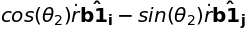

M velocity in the B1 frame: aka V_12 in B1


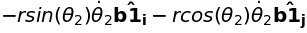

M velocity in the B0 frame: aka V_01 in B0


M velocity in the B1 frame: aka V_01 in B1


M acceleration in the B1 frame:


⎡                              2⎤
⎢-r⋅sin(θ₂)⋅θ₂̈ - r⋅cos(θ₂)⋅θ₂̇ ⎥
⎢                               ⎥
⎢             2                 ⎥
⎢r⋅sin(θ₂)⋅θ₂̇  - r⋅cos(θ₂)⋅θ₂̈ ⎥
⎢                               ⎥
⎣               0               ⎦

M acceleration in the B0 frame:


⎡ ⎛                         2⎞⎤
⎢-⎝sin(θ₁)⋅θ₁̈ + cos(θ₁)⋅θ₁̇ ⎠⎥
⎢                             ⎥
⎢              0              ⎥
⎢                             ⎥
⎢            2                ⎥
⎣ sin(θ₁)⋅θ₁̇  - cos(θ₁)⋅θ₁̈  ⎦

In [18]:
# TODO: Why don't we find the same results ??!
print("\n= = = = = = = = = = = = = = = = = = = = = = = =")
print("Solve the exercise with another method:\n")
# Another method with O and M points:
# Define the Origin Point
O = Point('O')
O.set_vel(B0, 0)  # Set velocity of O
O.set_acc(B0, 0)  # Set acceleration of O

# Define the M point from the origin
M = O.locatenew('M', r(t) * B2.x)
# Check the OM vector:
print("OM vector definition:")
M.pos_from(O)

# Set velocity of M in the B2 reference frame
print("M velocity in the B2 frame: aka V_23 in B2")
M.set_vel(B2, M.pos_from(O).dt(B2))
M.vel(B2)
print("M velocity in the B1 frame: aka V_23 in B1")
M.vel(B2).express(B1)

print("M velocity in the B1 frame: aka V_12 in B1")
M.set_vel(B1, (r * B2.x).dt(B1))  # Set velocity in the B1 reference frame
M.vel(B1).express(B1)

print("M velocity in the B0 frame: aka V_01 in B0")
M.set_vel(B0, (B1.x).dt(B0))  # Set velocity in the B1 reference frame
M.vel(B0).express(B0)
print("M velocity in the B1 frame: aka V_01 in B1")
M.vel(B0).express(B1)

print("M acceleration in the B1 frame:")
M.acc(B1).to_matrix(B1)

print("M acceleration in the B0 frame:")
trigsimp(M.acc(B0).to_matrix(B0))

In [19]:
%%HTML
<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#999; background:#fff;">
Created with Jupyter, Sympy, GlowScript, Numpy &emsp; - &emsp; MECA654 &nbsp; - &nbsp; Polytech Annecy-Chambéry &nbsp; - &nbsp; Pierre Nagorny &nbsp; - &nbsp; March 2018
</footer>